In [2]:
%matplotlib notebook

# Line Bands

The second input in $LiMe$ measurements is the band wavelength intervales with the line location and two adjacent and featureless continua. This design was inspired by the the Lick indexes by [Worthey et al (1993) and references therein](https://ui.adsabs.harvard.edu/abs/1994ApJS...94..687W/abstract).

At the $LiMe$ github, you may download this page as a notebook or a [script](https://github.com/Vital-Fernandez/lime/blob/master/examples/example8_line_bands.py).

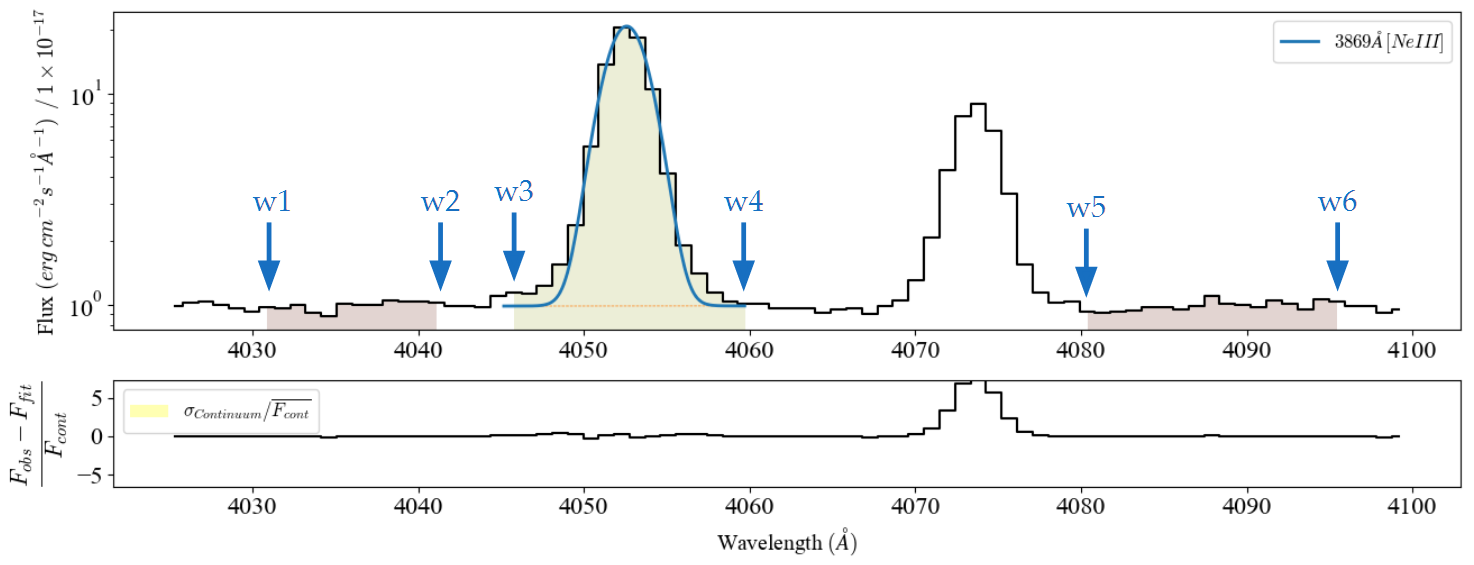

In [4]:
import numpy as np
from astropy.io import fits
from IPython.display import Image, display
from pathlib import Path
import lime

display(Image(filename='../images/bands_definition.png'))

A band consists in a 6 values array $(w_{1},.. w_{6})$ with the wavelength boundaries for the line location and two nearby blue and red continua. For $LiMe$ measurements, it is **essential** that:
    
   * The wavelenght array is sorted from lower to higher values.
   * The wavelength values are in the rest frame.
   * The wavelength units are the same as those declared in the target ``lime.Spectrum`` or ``lime.Cube`` observations.

## Default lines database:

$LiMe$ includes a database with common lines which can be observed in astronomical spectra. To access this database you can use the ``lime.line_bands``:

In [5]:
bands_df = lime.line_bands()

The default table wavelengths are in angstroms with the observed ``wavelength`` and band boundaries (``w1``, ``w2``,``w3``,``w4``,``w5``,``w6``) wavelength values in air.

However, you can constrain the output bands from the ``lime.line_bands`` function using its attributes. For example, you can limit the output line bands by a wavelenght interval with ``wave_inter``, as well as a ``lines_list`` and ``particle_list``. Regarding the output values, you can specify the ``units_wave`` and whether to apply a ``vacuum_conversion``. Finally, you can state the number of decimals on the line labels using the ``sig_fig`` attribute:

In [6]:
lime.line_bands(wave_inter=(300, 900), particle_list=('He1','O3','S2'), units_wave='nm', decimals=None, vacuum_conversion=True)

,wavelength,wave_vac,w1,w2,w3,w4,w5,w6,latex_label,particle,transition,rel_int
He1_403nm,402.733452,402.73345,401.503486,402.244991,402.270129,403.335171,403.435647,404.138977,$HeI403nm$,He1,rec,0
S2_407nm,406.974903,406.97490,405.938106,406.587703,406.630488,407.441240,408.159187,408.819158,$[SII]407nm$,S2,col,0
O3_436nm,436.443598,436.44360,429.897570,432.494291,435.817822,437.401787,439.206155,441.750863,$[OIII]436nm$,O3,col,0
He1_447nm,447.274040,447.27404,445.323193,446.639157,446.851915,447.876791,448.209876,449.824056,$HeI447nm$,He1,rec,0
He1_492nm,492.330504,492.33050,490.718146,491.762466,491.908118,492.953284,493.204228,494.116484,$HeI492nm$,He1,rec,0
O3_496nm,496.029500,496.02950,493.073376,494.818947,494.976792,497.217554,497.428449,498.588373,$[OIII]496nm$,O3,col,0
O3_501nm,500.824004,500.82400,497.326052,498.598165,499.681938,502.578172,502.922278,504.528111,$[OIII]501nm$,O3,col,0
He1_588nm,587.724329,587.72433,584.742570,586.742789,586.886434,588.729942,589.010016,590.358048,$HeI588nm$,He1,rec,0
He1_668nm,667.999556,667.99955,666.105098,667.204538,667.267813,669.001580,669.174956,670.012944,$HeI668nm$,He1,rec,0
S2_672nm,671.829502,671.82950,668.873329,670.826383,670.941255,672.742554,674.640249,676.192505,$[SII]672nm$,S2,col,0


## Using a dataframe:

In $LiMe$, a bands table (and the output measurement logs) variable is a [pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

To get the data from a certain column you can use several commands:

In [7]:
print(bands_df.columns)

labels = bands_df.index.to_numpy()
ions = bands_df['particle'].to_numpy()
wave_array = bands_df.wavelength.to_numpy()

labels, ions, wave_array

Index(['wavelength', 'wave_vac', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6',
       'latex_label', 'particle', 'transition', 'rel_int'],
      dtype='object')


(array(['H1_1215A', 'C4_1548A', 'He2_1640A', 'O3_1666A', 'C3_1908A',
        'Mg2_2803A', 'Ne5_3426A', 'H1_3704A', 'O2_3726A', 'O2_3729A',
        'H1_3750A', 'H1_3771A', 'H1_3798A', 'H1_3835A', 'Ne3_3869A',
        'H1_3889A', 'H1_3970A', 'He1_4026A', 'S2_4069A', 'H1_4102A',
        'H1_4340A', 'O3_4363A', 'He1_4471A', 'Fe3_4658A', 'He2_4685A',
        'Ar4_4711A', 'Ar4_4740A', 'H1_4861A', 'He1_4922A', 'O3_4959A',
        'O3_5007A', 'N2_5755A', 'He1_5876A', 'O1_6300A', 'S3_6312A',
        'N2_6548A', 'H1_6563A', 'N2_6583A', 'He1_6678A', 'S2_6716A',
        'S2_6731A', 'He1_7065A', 'Ar3_7136A', 'O2_7319A', 'O2_7330A',
        'Ar3_7751A', 'H1_8392A', 'H1_8413A', 'H1_8438A', 'H1_8467A',
        'H1_8502A', 'H1_8545A', 'H1_8598A', 'H1_8665A', 'H1_8750A',
        'H1_8863A', 'H1_9015A', 'S3_9068A', 'H1_9229A', 'S3_9530A',
        'H1_9546A', 'H1_10049A', 'He1_10830A', 'H1_10938A', 'O1_11287A',
        'Fe2_12566A', 'H1_12818A', 'Fe2_16443A', 'H1_18751A', 'H1_19445A',
        'H2_19570A',

Similarly, you can use these comands to get the data from one of the rows:

In [8]:
# List of lines on this dataframe
print(bands_df.index.to_numpy())

['H1_1215A' 'C4_1548A' 'He2_1640A' 'O3_1666A' 'C3_1908A' 'Mg2_2803A'
 'Ne5_3426A' 'H1_3704A' 'O2_3726A' 'O2_3729A' 'H1_3750A' 'H1_3771A'
 'H1_3798A' 'H1_3835A' 'Ne3_3869A' 'H1_3889A' 'H1_3970A' 'He1_4026A'
 'S2_4069A' 'H1_4102A' 'H1_4340A' 'O3_4363A' 'He1_4471A' 'Fe3_4658A'
 'He2_4685A' 'Ar4_4711A' 'Ar4_4740A' 'H1_4861A' 'He1_4922A' 'O3_4959A'
 'O3_5007A' 'N2_5755A' 'He1_5876A' 'O1_6300A' 'S3_6312A' 'N2_6548A'
 'H1_6563A' 'N2_6583A' 'He1_6678A' 'S2_6716A' 'S2_6731A' 'He1_7065A'
 'Ar3_7136A' 'O2_7319A' 'O2_7330A' 'Ar3_7751A' 'H1_8392A' 'H1_8413A'
 'H1_8438A' 'H1_8467A' 'H1_8502A' 'H1_8545A' 'H1_8598A' 'H1_8665A'
 'H1_8750A' 'H1_8863A' 'H1_9015A' 'S3_9068A' 'H1_9229A' 'S3_9530A'
 'H1_9546A' 'H1_10049A' 'He1_10830A' 'H1_10938A' 'O1_11287A' 'Fe2_12566A'
 'H1_12818A' 'Fe2_16443A' 'H1_18751A' 'H1_19445A' 'H2_19570A' 'Si6_19640A'
 'He1_20581A' 'H2_21212A' 'H1_21655A' 'H2_24059A' 'Si6_24823A' 'H1_26251A'
 'H1_30383A' 'H1_32960A' 'PAH1_32991A' 'H1_37395A' 'H1_40511A' 'H1_46524A'
 'S4_105075A' '

In [9]:
H1_1215A_params = bands_df.iloc[0].to_numpy()
H1_4861A_params = bands_df.loc['H1_4861A'].to_numpy()
H1_1215A_params, H1_4861A_params

(array([1215.1108, 1215.6699, 1100.0, 1150.0, 1195.0, 1230.0, 1250.0,
        1300.0, '$HI1215\\AA$', 'H1', 'rec', 0], dtype=object),
 array([4861.2582, 4862.691, 4809.8, 4836.1, 4848.715437, 4876.181741,
        4883.13, 4908.4, '$HI4861\\AA$', 'H1', 'rec', 0], dtype=object))

Finally, you can combine these commands to access the data from certain cells:

In [10]:
bands_df.at['H1_1215A', 'wavelength']

1215.1108

In [11]:
bands_df.loc['H1_1215A', 'wavelength'], bands_df.loc['H1_1215A'].wavelength

(1215.1108, 1215.1108)

In [12]:
bands_df.loc[['H1_1215A', 'H1_4861A'], 'wavelength'].to_numpy(), 

(array([1215.1108, 4861.2582]),)

In [13]:
bands_df.loc['H1_1215A':'He2_1640A', 'wavelength'].to_numpy()

array([1215.1108, 1547.6001, 1639.7896])

In [14]:
bands_df.loc['H1_1215A', 'w1':'w6'].to_numpy()

array([1100.0, 1150.0, 1195.0, 1230.0, 1250.0, 1300.0], dtype=object)

## Load/save a bands dataframe/measurements log:

To save these dataframes you can use the ``save_log``:

In [15]:
# Save to the current folder in several formats:
lime.save_log(bands_df, 'bands_frame.txt')
lime.save_log(bands_df, 'bands_frame.pdf', parameters=['wavelength', 'latex_label'])

In files with a multi-page structure you can specify the extension:

In [16]:
lime.save_log(bands_df, 'bands_frame.xlsx', ext='BANDS')
lime.save_log(bands_df, 'bands_frame.fits', ext='BANDS')

Similarly, to read these files as a pandas dataframe you can use:

In [17]:
bands_df = lime.load_log('bands_frame.txt')
bands_df = lime.load_log('bands_frame.xlsx', ext='BANDS')
bands_df = lime.load_log('bands_frame.fits', ext='BANDS')

## Updating the bands database:

The user is adviced to keep his/her own bands database with the bands and latex labels he/she prefers. Afterwards, you can use it in $LiMe$ functions (including ``lime.line_bands``) to run your scripts. However, in case you need to update the default database you can recover its location with this command:

In [18]:
lime.io._parent_bands_file

WindowsPath('D:/Pycharm projects/lime/src/lime/resources/parent_bands.txt')

<div class="alert alert-info">

**Please remember:** If you need to update the default $LiMe$ lines database make sure to fill all the columns. If there is any issue you can download the default database from the [github](https://github.com/Vital-Fernandez/lime/blob/310d42ac507862a472c0bc14d291f216cb05e9d3/src/lime/resources/parent_mask.txt) (or reinstall $LiMe$)

</div>